# Cox-Munk Distribution

The Cox-Munk distribution is a bivariate (an)isotropic Gaussian that describes the distribition of wave surface-facet slopes with respect to wind speed.

In [86]:
import numpy as np

In [87]:
# Actual distribution PDF
def cox_munk(phw, zx, zy, wspd):
    sigmaC = 0.003 + 0.00192 * wspd
    sigmaU = 0.00316 * wspd
    C21 = 0.01 - 0.0086 * wspd
    C03 = 0.04 - 0.033 * wspd
    C40 = 0.40
    C22 = 0.12
    C04 = 0.23
    xe = (np.cos(phw) * zx + np.sin(phw) * zy) / np.sqrt(sigmaC)
    xn = (-np.sin(phw) * zx + np.cos(phw) * zy) / np.sqrt(sigmaU)
    xe2 = xe * xe
    xn2 = xn * xn
    coef = 1.0 - C21 / 2.0 * (xe2 - 1.0) * xn - C03 / 6.0 * (xn2 - 3) * xn
    coef = coef + C40 / 24.0 * (xe2 * xe2 - 6.0 * xe2 + 3.0)
    coef = coef + C04 / 24.0 * (xn2 * xn2 - 6.0 * xn2 + 3.0)
    coef = coef + C22 / 4.0 * (xe2 - 1.0) * (xn2 - 1.0)
    prob = coef / (2.0 * np.pi * np.sqrt(sigmaU) * np.sqrt(sigmaC)) * np.exp(-(xe2 + xn2) * 0.5)
    return prob

In [88]:
# Initialize wind speed and direction
wind_speed = 10
wind_azimuth = 0.0

# Initialize the solar angles
res = 50
zeniths = np.linspace(0, np.pi / 2, res)
azimuths = np.linspace(0, 2 * np.pi, res)

In [89]:
# Define the number of angles
N = 91
zenith_ss = np.linspace(0, np.pi / 2, N)
solar_azimuth = 0.0

# For each solar zenith, compute the probability map
results = {}
idx = 0
max_idx = len(zenith_ss)

azim_vs = np.linspace(0, 2 * np.pi, 2 * res)
zen_vs = np.linspace(0, np.pi / 2, res)

max_val = 0

for solar_zenith in zenith_ss:
    pdf = np.zeros((res, res))
    for i, zenith in enumerate(zeniths):
        for j, azimuth in enumerate(azimuths):
            phi = solar_azimuth - azimuth
            phw = solar_azimuth - wind_azimuth

            cs = round(np.cos(solar_zenith), 8)
            cv = round(np.cos(np.pi / 2 - zenith), 8)
            ss = round(np.sin(solar_zenith), 8)
            sv = round(np.sin(np.pi / 2 - zenith), 8)

            zx = -sv * round(np.sin(phi), 8) / (cs + cv)
            zy = (ss + sv * round(np.cos(phi), 8)) / (cs + cv)

            specular_probability = cox_munk(phw, zx, zy, wind_speed) / 6.74
            if np.isnan(specular_probability):
                specular_probability = 0

            if specular_probability > max_val:
                max_val = specular_probability

            pdf[i, j] = specular_probability
    results[solar_zenith] = pdf
    idx += 1
    print(f"Progress: {idx}/{max_idx}")

print(f"Max value: {max_val}")


Progress: 1/91
Progress: 2/91
Progress: 3/91
Progress: 4/91
Progress: 5/91
Progress: 6/91
Progress: 7/91
Progress: 8/91
Progress: 9/91
Progress: 10/91
Progress: 11/91
Progress: 12/91
Progress: 13/91
Progress: 14/91
Progress: 15/91
Progress: 16/91
Progress: 17/91
Progress: 18/91
Progress: 19/91
Progress: 20/91
Progress: 21/91
Progress: 22/91
Progress: 23/91
Progress: 24/91
Progress: 25/91
Progress: 26/91
Progress: 27/91
Progress: 28/91
Progress: 29/91
Progress: 30/91
Progress: 31/91
Progress: 32/91
Progress: 33/91
Progress: 34/91
Progress: 35/91
Progress: 36/91
Progress: 37/91
Progress: 38/91
Progress: 39/91
Progress: 40/91
Progress: 41/91
Progress: 42/91
Progress: 43/91
Progress: 44/91
Progress: 45/91
Progress: 46/91
Progress: 47/91
Progress: 48/91
Progress: 49/91
Progress: 50/91
Progress: 51/91
Progress: 52/91
Progress: 53/91
Progress: 54/91
Progress: 55/91
Progress: 56/91
Progress: 57/91
Progress: 58/91
Progress: 59/91
Progress: 60/91
Progress: 61/91
Progress: 62/91
Progress: 63/91
P

/var/folders/2y/rhmx4lpx7yj6c8p50ldw1x_c0000gp/T/ipykernel_41673/3498662500.py:28: RuntimeWarning: invalid value encountered in scalar divide
  zx = -sv * round(np.sin(phi), 8) / (cs + cv)
/var/folders/2y/rhmx4lpx7yj6c8p50ldw1x_c0000gp/T/ipykernel_41673/3498662500.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  zy = (ss + sv * round(np.cos(phi), 8)) / (cs + cv)
/var/folders/2y/rhmx4lpx7yj6c8p50ldw1x_c0000gp/T/ipykernel_41673/3543059763.py:10: RuntimeWarning: invalid value encountered in scalar multiply
  xe = (np.cos(phw) * zx + np.sin(phw) * zy) / np.sqrt(sigmaC)
/var/folders/2y/rhmx4lpx7yj6c8p50ldw1x_c0000gp/T/ipykernel_41673/3498662500.py:28: RuntimeWarning: divide by zero encountered in scalar divide
  zx = -sv * round(np.sin(phi), 8) / (cs + cv)
/var/folders/2y/rhmx4lpx7yj6c8p50ldw1x_c0000gp/T/ipykernel_41673/3543059763.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  xn = (-np.sin(phw) * zx + np.cos(phw) * zy) / np.sqrt(sigmaU)


In [90]:
# Clear all files in cox_munk
import os

for file in os.listdir("cox_munk"):
    os.remove(os.path.join("cox_munk", file))

In [91]:
# Plot the PDF as a heatmap
import matplotlib.pyplot as plt

idx = 0

for solar_zenith, pdf in results.items():
    # Make plot as a heatmap
    plt.imshow(pdf, cmap='turbo', interpolation='quadric', extent=[0, 2 * np.pi, 0, np.pi / 2])

    # Name the axes
    plt.xlabel("Outgoing Azimuth (rad)")
    plt.ylabel("Outgoing Zenith (rad)")

    # Add the title
    degrees = np.degrees(solar_zenith)

    # Round to 2 decimal places
    degrees = round(degrees, 2)

    plt.title("Solar Zenith = " + str(degrees))

    # Colorbar
    plt.colorbar()

    # Save the image
    filename = "cox_munk/" + str(degrees) + ".png"
    plt.savefig(filename)

    idx = idx + 1
    print(f"Progress: {idx}/{max_idx}")
    plt.close()

# Stop viewing the plot
plt.close()

Progress: 1/91
Progress: 2/91
Progress: 3/91
Progress: 4/91
Progress: 5/91
Progress: 6/91
Progress: 7/91
Progress: 8/91
Progress: 9/91
Progress: 10/91
Progress: 11/91
Progress: 12/91
Progress: 13/91
Progress: 14/91
Progress: 15/91
Progress: 16/91
Progress: 17/91
Progress: 18/91
Progress: 19/91
Progress: 20/91
Progress: 21/91
Progress: 22/91
Progress: 23/91
Progress: 24/91
Progress: 25/91
Progress: 26/91
Progress: 27/91
Progress: 28/91
Progress: 29/91
Progress: 30/91
Progress: 31/91
Progress: 32/91
Progress: 33/91
Progress: 34/91
Progress: 35/91
Progress: 36/91
Progress: 37/91
Progress: 38/91
Progress: 39/91
Progress: 40/91
Progress: 41/91
Progress: 42/91
Progress: 43/91
Progress: 44/91
Progress: 45/91
Progress: 46/91
Progress: 47/91
Progress: 48/91
Progress: 49/91
Progress: 50/91
Progress: 51/91
Progress: 52/91
Progress: 53/91
Progress: 54/91
Progress: 55/91
Progress: 56/91
Progress: 57/91
Progress: 58/91
Progress: 59/91
Progress: 60/91
Progress: 61/91
Progress: 62/91
Progress: 63/91
P

In [92]:
# Create gif animation
import imageio

filesnames = ["cox_munk/" + str(round(np.degrees(zenith), 2)) + ".png" for zenith in zenith_vs]

images = [imageio.imread(filename) for filename in filesnames]
imageio.mimsave('cox_munk/animation.gif', images, duration=5)

/var/folders/2y/rhmx4lpx7yj6c8p50ldw1x_c0000gp/T/ipykernel_41673/2504805664.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(filename) for filename in filesnames]


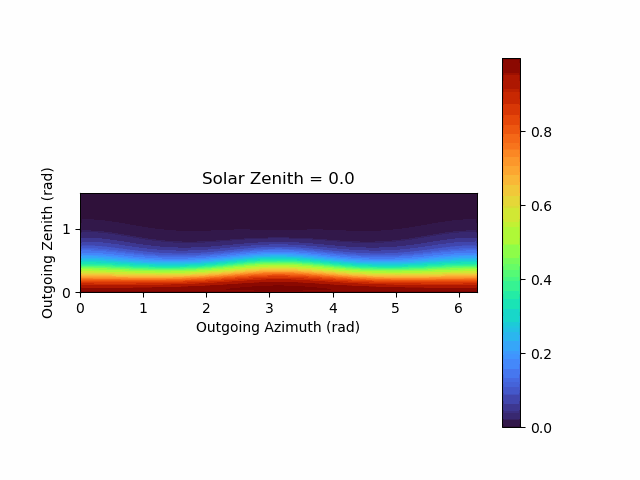

In [94]:
# display the animation
from IPython.display import Image

Image("cox_munk/animation.gif")